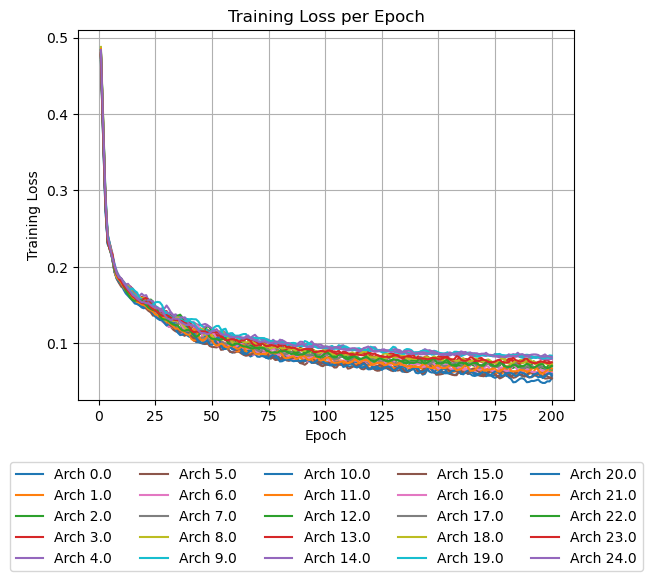

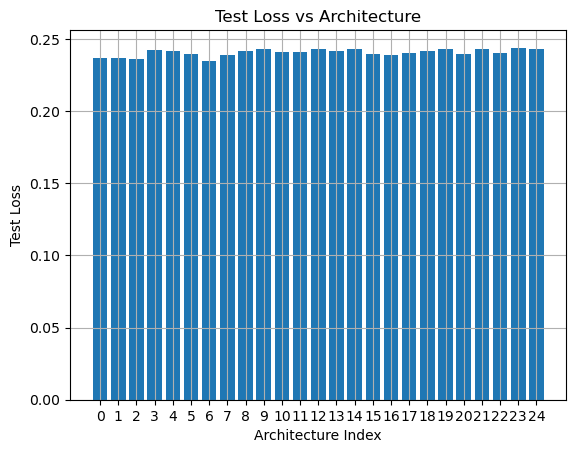

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = 'fine_tune_both_results.csv'
df = pd.read_csv(csv_file_path)

# Plot training loss per epoch for architectures that have gone below 0.19
def plot_training_loss_below_threshold(df, threshold=0.19):
    num_epochs = df.shape[1] - 2  # Subtract 2 for 'Index' and 'Final Test Loss'
    
    for index, row in df.iterrows():
        train_loss = row[1:-1].values  # Skip 'Index' and 'Final Test Loss'
        
        # Check if the training loss has ever gone below the threshold
        if any(train_loss < threshold):
            plt.plot(range(1, len(train_loss) + 1), train_loss, label=f'Arch {row["Index"]}')
    
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title(f'Training Loss per Epoch')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)  # Adjust ncol for number of columns
    plt.grid(True)
    plt.show()

# Plot test loss vs architecture for those that went below threshold
def plot_test_loss_below_threshold(df, threshold=0.9):
    below_threshold_indices = []

    # Collect architectures that have gone below the threshold
    for index, row in df.iterrows():
        train_loss = row[1:-1].values  # Skip 'Index' and 'Final Test Loss'
        if any(train_loss < threshold):
            below_threshold_indices.append(row["Index"])

    # Filter DataFrame to include only those architectures
    filtered_df = df[df['Index'].isin(below_threshold_indices)]
    
    test_losses = filtered_df['Final Test Loss'].values  # Get the final test loss column
    arch_indices = filtered_df['Index'].values           # Get the architecture indices
    
    plt.bar(arch_indices, test_losses)
    plt.xlabel('Architecture Index')
    plt.ylabel('Test Loss')
    plt.title(f'Test Loss vs Architecture')
    plt.xticks(arch_indices)  # Set x-axis labels to architecture indices
    plt.grid(True)
    plt.show()

# Call the updated plotting functions
plot_training_loss_below_threshold(df,threshold=0.9)
plot_test_loss_below_threshold(df)
